## 作業目標

通過建立多層的神經網路，了解權重矩陣更新。

## 作業重點

三層神經網路，通過增加更多的中間層，以對更多關係的組合進行建模。

syn1 權重矩陣將隱層的組合輸出映射到最終結果，而在更新 syn1 的同時，還需要更新 syn0 權重矩陣，以從輸入資料中更好地產生這些組合。

## 參考資料

[ML Lecture 7: Backpropagation](https://www.youtube.com/watch?v=ibJpTrp5mcE)

[神经网络中利用矩阵进行反向传播运算的实质](https://zhuanlan.zhihu.com/p/25496760)

[一文弄懂神经网络中的反向传播法 - BackPropagation](https://www.cnblogs.com/charlotte77/p/5629865.html)

[\[筆記\] 深度學習(Deep Learning) - 反向傳播](https://ithelp.ithome.com.tw/articles/10198813)

[BP 神经网络的原理及 Python 实现](https://blog.csdn.net/conggova/article/details/77799464)

[最简单的 BP 神经网络的手工实现](https://github.com/conggova/SimpleBPNetwork)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

In [2]:
# l1 共有三個神經元 / l2 只有一個神經元
X = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])
y = np.array([[0, 0, 1, 1]]).T
w1 = 2 * np.random.random((3, 3,)) - 1
w2 = 2 * np.random.random((3, 1,)) - 1

In [3]:
def acfun(val, derivative=False):
    if derivative:
        return val * (1 - val)
    return 1 / (1 + np.exp(-val))

In [4]:
def back_propagation_iterator(l0, out, syn0, syn1, epochs=10000, learning_rate=0.1):
    syn0_iters, syn1_iters = {}, {}
    for i in range(epochs):
        l1 = acfun(np.dot(l0, syn0))
        l2 = acfun(np.dot(l0, syn1))
        dLdl2 = acfun(l2, True) * (out - l2)
        dLdsyn1 = np.dot(l1.T, dLdl2)
        dLdl1 = acfun(l1, True) * np.dot(dLdl2, syn1.T)
        dLdsyn0 = np.dot(l0.T, dLdl1)
        syn0, syn0_iters[i] = syn0 - learning_rate * dLdsyn0, syn0
        syn1, syn1_iters[i] = syn1 - learning_rate * dLdsyn1, syn1
    return tuple(np.array(list(iters.items())) for iters in (syn0_iters, syn1_iters,))

def back_propagation_plot(n, syn, title):
    for i in range(syn.shape[1]):
        plt.plot(n, syn[:, i], ms=3, lw=1.5, c='k')
    plt.xlabel('${}$'.format(title).format(title), fontsize=16)
    plt.show()

In [5]:
syn0_iters, syn1_iters = back_propagation_iterator(X, y, w1, w2)
n, syn0, syn1 = syn0_iters[:, 0], np.array(list(syn0_iters[:, 1])), np.array(list(syn1_iters[:, 1]))

In [6]:
syn0_iters

array([[0,
        array([[-0.1280102 , -0.94814754,  0.09932496],
       [-0.12935521, -0.1592644 , -0.33933036],
       [-0.59070273,  0.23854193, -0.40069065]])],
       [1,
        array([[-0.12521407, -0.9495968 ,  0.09894267],
       [-0.12948156, -0.15909298, -0.33932841],
       [-0.59072392,  0.2387095 , -0.40071398]])],
       [2,
        array([[-0.12242007, -0.95107867,  0.09856775],
       [-0.12961072, -0.15891471, -0.33932591],
       [-0.59074574,  0.23888366, -0.40073639]])],
       ...,
       [9997,
        array([[ 0.39106257, -3.49537316, -0.40526905],
       [-0.2443897 ,  0.47427387, -0.25599928],
       [ 1.71575805,  4.11189263,  2.99716961]])],
       [9998,
        array([[ 0.39106257, -3.49537316, -0.40526905],
       [-0.2443897 ,  0.47427387, -0.25599928],
       [ 1.71581602,  4.11191478,  2.99720512]])],
       [9999,
        array([[ 0.39106257, -3.49537316, -0.40526905],
       [-0.2443897 ,  0.47427387, -0.25599928],
       [ 1.71587398,  4.11193692, 

In [7]:
syn1_iters

array([[0,
        array([[-0.46634545],
       [ 0.24226767],
       [ 0.05828419]])],
       [1,
        array([[-0.46591678],
       [ 0.24803615],
       [ 0.05721189]])],
       [2,
        array([[-0.46549402],
       [ 0.25382652],
       [ 0.05615363]])],
       ...,
       [9997,
        array([[ 3.86633039],
       [12.0370738 ],
       [ 6.75529543]])],
       [9998,
        array([[ 3.86642876],
       [12.03718799],
       [ 6.75540598]])],
       [9999,
        array([[ 3.86652712],
       [12.03730217],
       [ 6.75551651]])]], dtype=object)

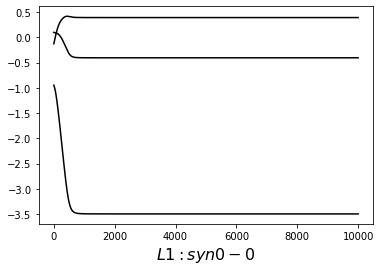

In [8]:
back_propagation_plot(n, syn0[:, 0], 'L1: syn0 - 0')

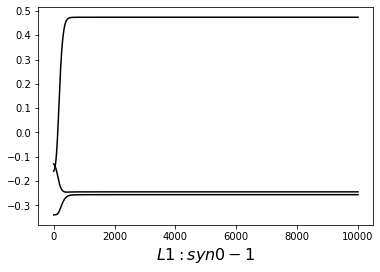

In [9]:
back_propagation_plot(n, syn0[:, 1], 'L1: syn0 - 1')

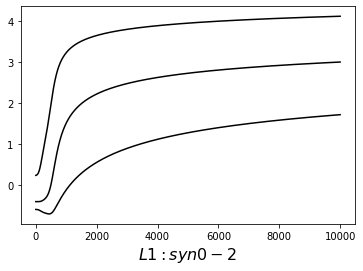

In [10]:
back_propagation_plot(n, syn0[:, 2], 'L1: syn0 - 2')

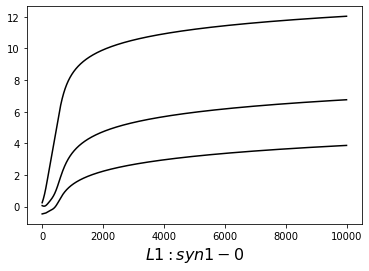

In [11]:
back_propagation_plot(n, syn1, 'L1: syn1 - 0')